<a href="https://colab.research.google.com/github/Sai0472003/ECO482_TORNADO_PROJECT/blob/main/Code_and_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
file_path = '/content/drive/My Drive/GDToT/ECO482_Project/Data/clean_data.csv'

In [47]:
df = pd.read_csv(file_path)

In [48]:
df.head()

,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,TOR_LENGTH,TOR_WIDTH,NET_DAMAGE,BEGIN,END,DURATION_HOURS,...,STATE_WEST VIRGINIA,STATE_WISCONSIN,STATE_WYOMING,TOR_F_SCALE_EF0,TOR_F_SCALE_EF1,TOR_F_SCALE_EF2,TOR_F_SCALE_EF3,TOR_F_SCALE_EF4,TOR_F_SCALE_EF5,TOR_F_SCALE_EFU
0,0,0,0,0,6.70,400.0,150000.0,2024-05-19 18:39:00,2024-05-19 19:02:00,0.383333,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0.32,50.0,120000.0,2024-11-05 11:01:00,2024-11-05 11:02:00,0.016667,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,2.58,110.0,0.0,2024-02-27 19:32:00,2024-02-27 19:35:00,0.050000,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,2.45,160.0,0.0,2024-02-27 19:34:00,2024-02-27 19:37:00,0.050000,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0.05,10.0,0.0,2024-02-27 18:15:00,2024-02-27 18:16:00,0.016667,...,0,0,0,1,0,0,0,0,0,0


In [49]:
df['BEGIN'] = pd.to_datetime(df['BEGIN'], format='%Y-%m-%d %H:%M:%S')

In [50]:
df["BEGIN_month"] = df["BEGIN"].dt.month  # Month (1-12)
df["BEGIN_hour"] = df["BEGIN"].dt.hour    # Hour (0-23)
df["BEGIN_day_of_week"] = df["BEGIN"].dt.dayofweek  # Day of week (0=Monday, 6=Sunday)

In [51]:
df = df.drop(columns=['BEGIN', 'END'])

In [52]:
df.shape

(25879, 72)

In [53]:
df['ln_NET_DAMAGE'] = np.log(df['NET_DAMAGE'] + 1)

Text(0, 0.5, 'Frequency')

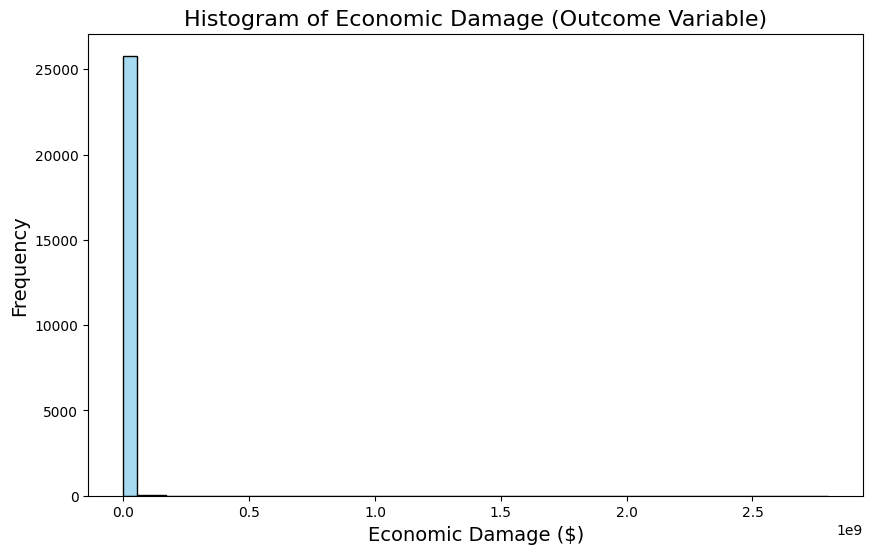

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['NET_DAMAGE'], bins=50, color='skyblue')

plt.title('Histogram of Economic Damage (Outcome Variable)', fontsize=16)
plt.xlabel('Economic Damage ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Text(0, 0.5, 'Frequency')

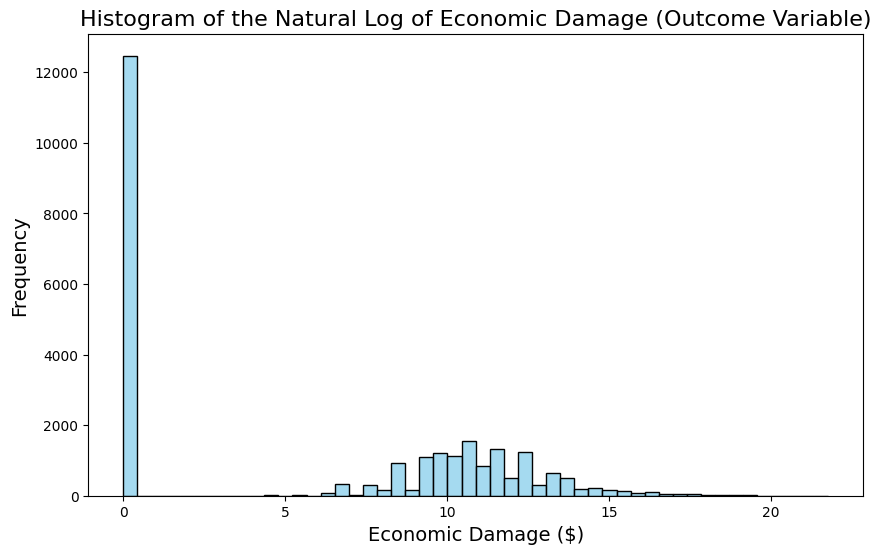

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ln_NET_DAMAGE'], bins=50, color='skyblue')

plt.title('Histogram of the Natural Log of Economic Damage (Outcome Variable)', fontsize=16)
plt.xlabel('Economic Damage ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

In [56]:
df[df['NET_DAMAGE'] != 0]

,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,TOR_LENGTH,TOR_WIDTH,NET_DAMAGE,DURATION_HOURS,TextBlob_Score,STATE_ALABAMA,...,TOR_F_SCALE_EF1,TOR_F_SCALE_EF2,TOR_F_SCALE_EF3,TOR_F_SCALE_EF4,TOR_F_SCALE_EF5,TOR_F_SCALE_EFU,BEGIN_month,BEGIN_hour,BEGIN_day_of_week,ln_NET_DAMAGE
0,0,0,0,0,6.70,400.0,150000.0,0.383333,-0.011054,0,...,1,0,0,0,0,0,5,18,6,11.918397
1,0,0,0,0,0.32,50.0,120000.0,0.016667,-0.053750,0,...,0,0,0,0,0,0,11,11,1,11.695255
26,0,0,0,0,1.56,100.0,150000.0,0.050000,0.149509,0,...,0,0,0,0,0,0,1,17,5,11.918397
27,0,0,0,0,0.42,10.0,50000.0,0.083333,-0.070833,0,...,0,0,0,0,0,0,3,15,4,10.819798
35,0,0,0,0,9.30,75.0,75000.0,0.300000,-0.017593,0,...,1,0,0,0,0,0,7,17,2,11.225257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25874,0,0,0,0,12.24,500.0,250000.0,0.283333,0.026667,1,...,1,0,0,0,0,0,3,12,3,12.429220
25875,0,0,0,0,0.90,400.0,100000.0,0.033333,0.188955,1,...,1,0,0,0,0,0,3,16,3,11.512935
25876,4,0,1,0,7.69,448.0,500000.0,0.183333,-0.073016,0,...,0,1,0,0,0,0,3,17,3,13.122365
25877,8,0,2,0,32.46,1790.0,110000000.0,0.483333,-0.018287,0,...,0,0,1,0,0,0,3,21,3,18.515991


Text(0, 0.5, 'Frequency')

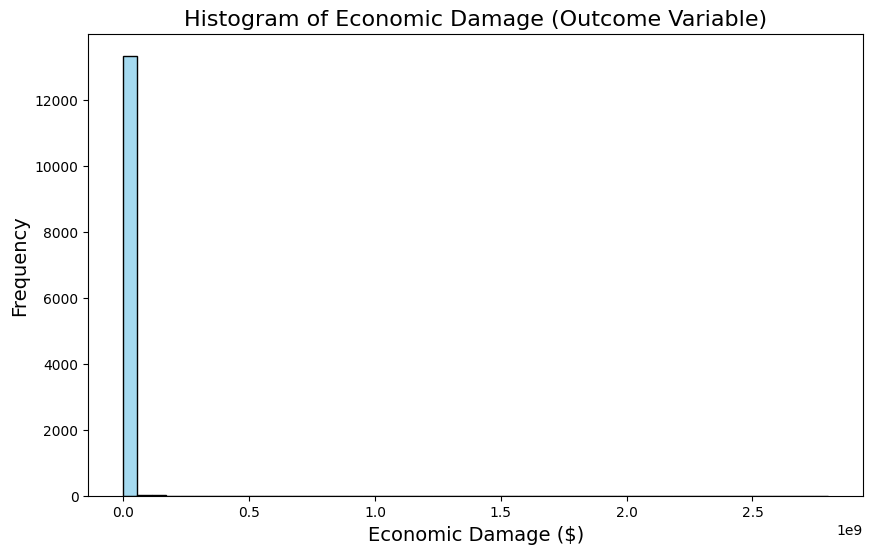

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df['NET_DAMAGE'][df['NET_DAMAGE'] != 0], bins=50, color='skyblue')

plt.title('Histogram of Economic Damage (Outcome Variable)', fontsize=16)
plt.xlabel('Economic Damage ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Text(0, 0.5, 'Frequency')

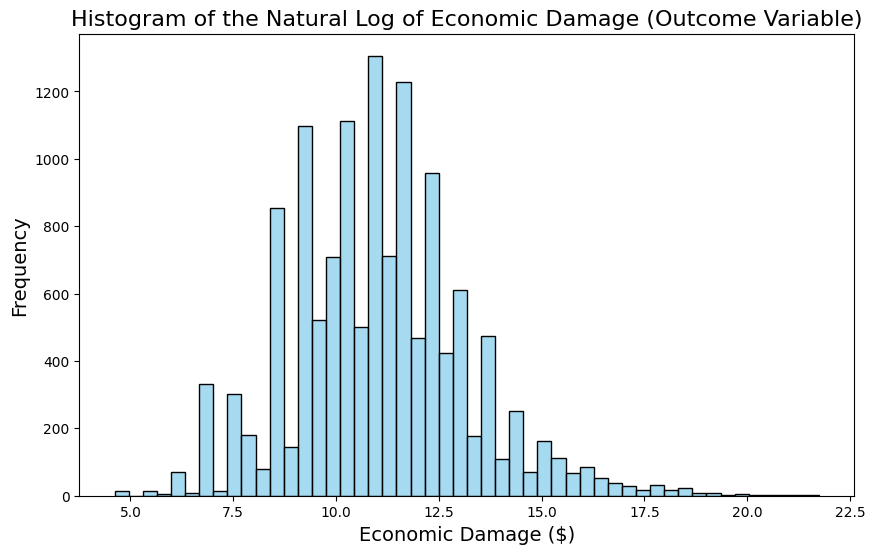

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ln_NET_DAMAGE'][df['ln_NET_DAMAGE'] != 0], bins=50, color='skyblue')

plt.title('Histogram of the Natural Log of Economic Damage (Outcome Variable)', fontsize=16)
plt.xlabel('Economic Damage ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

In [59]:
df.columns

Index(['INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'TOR_LENGTH', 'TOR_WIDTH', 'NET_DAMAGE',
       'DURATION_HOURS', 'TextBlob_Score', 'STATE_ALABAMA', 'STATE_ALASKA',
       'STATE_ARIZONA', 'STATE_ARKANSAS', 'STATE_CALIFORNIA', 'STATE_COLORADO',
       'STATE_CONNECTICUT', 'STATE_DELAWARE', 'STATE_DISTRICT OF COLUMBIA',
       'STATE_FLORIDA', 'STATE_GEORGIA', 'STATE_HAWAII', 'STATE_IDAHO',
       'STATE_ILLINOIS', 'STATE_INDIANA', 'STATE_IOWA', 'STATE_KANSAS',
       'STATE_KENTUCKY', 'STATE_LOUISIANA', 'STATE_MAINE', 'STATE_MARYLAND',
       'STATE_MASSACHUSETTS', 'STATE_MICHIGAN', 'STATE_MINNESOTA',
       'STATE_MISSISSIPPI', 'STATE_MISSOURI', 'STATE_MONTANA',
       'STATE_NEBRASKA', 'STATE_NEVADA', 'STATE_NEW HAMPSHIRE',
       'STATE_NEW JERSEY', 'STATE_NEW MEXICO', 'STATE_NEW YORK',
       'STATE_NORTH CAROLINA', 'STATE_NORTH DAKOTA', 'STATE_OHIO',
       'STATE_OKLAHOMA', 'STATE_OREGON', 'STATE_PENNSYLVANIA',
       'STATE_PUERTO RICO',

In [60]:
X = df[df['ln_NET_DAMAGE'] != 0].drop(columns=['NET_DAMAGE', 'ln_NET_DAMAGE', 'TextBlob_Score'])
y = df['ln_NET_DAMAGE'][df['ln_NET_DAMAGE'] != 0]

In [61]:
null_count = df.isnull().sum()
null_count

,0
INJURIES_DIRECT,0
INJURIES_INDIRECT,0
DEATHS_DIRECT,0
DEATHS_INDIRECT,0
TOR_LENGTH,0
...,...
TOR_F_SCALE_EFU,0
BEGIN_month,0
BEGIN_hour,0
BEGIN_day_of_week,0


# MLR Model:

MSE:   2.4077149734351737
RMSE:  1.5516813375932488
R²:    0.464518779469244
Mean Dollar Error (exponentiated MAE):    230479333.64510813


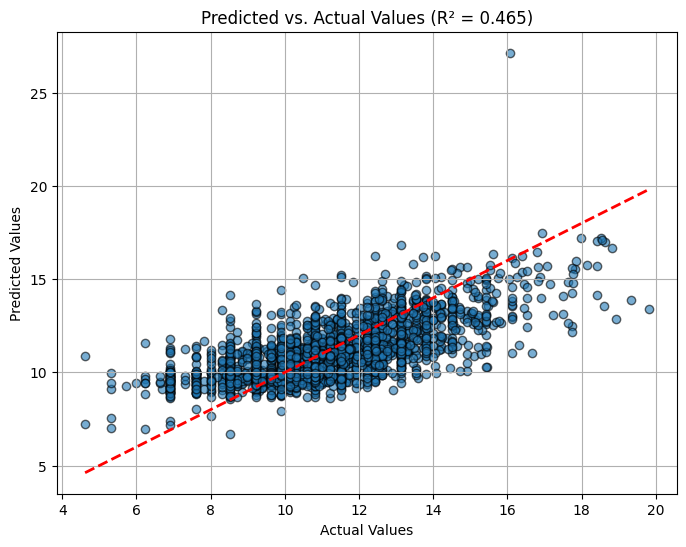

In [62]:
import statsmodels.api as sm

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

#Fit the model on the training set
ols_model = sm.OLS(y_train, X_train).fit()


#Evaluate on the test set
y_pred = ols_model.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)
errors = np.abs(np.exp(y_test) - np.exp(y_pred))
dollar_error = np.mean(errors)

print("MSE:  ", mse)
print("RMSE: ", rmse)
print("R²:   ", r2)
print("Mean Dollar Error (exponentiated MAE):   ", dollar_error)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs. Actual Values (R² = {r2:.3f})")
plt.grid(True)

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


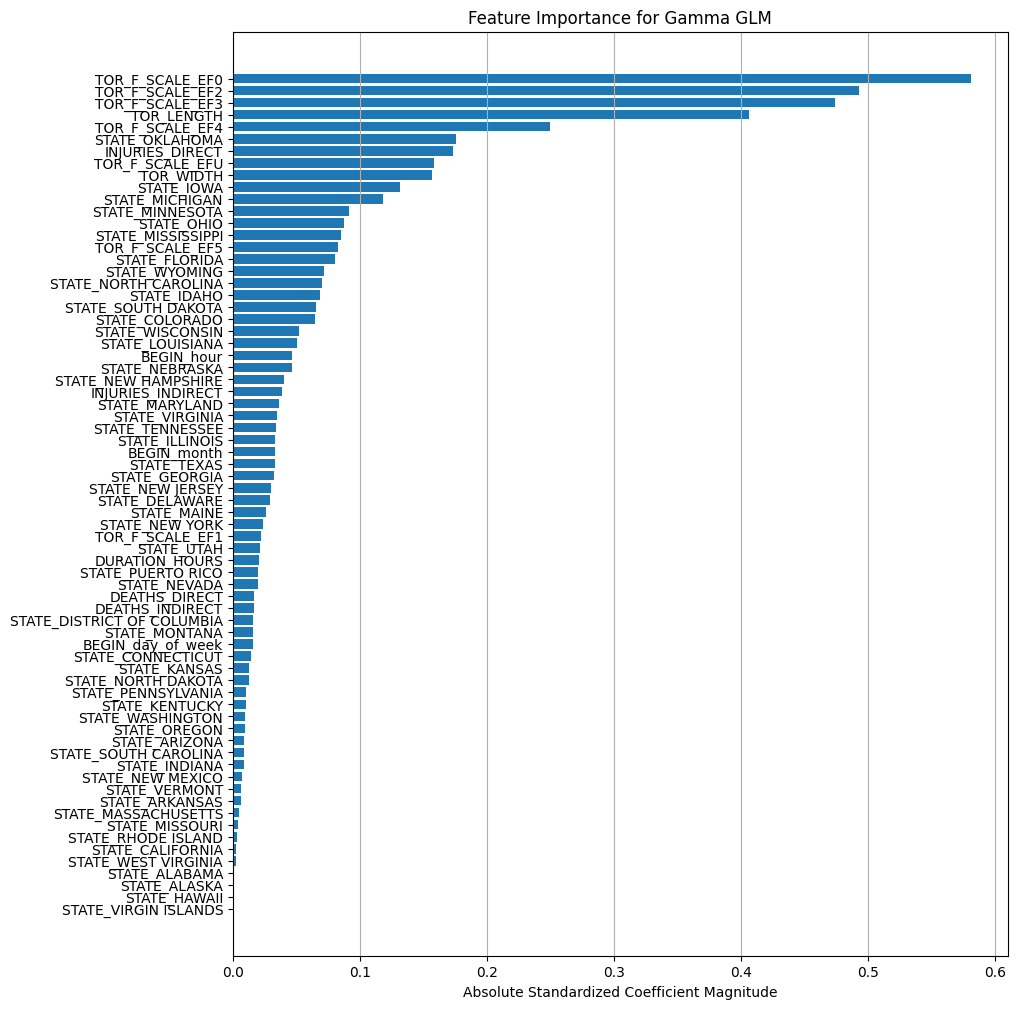

In [63]:
#get coeffs
coefficients = ols_model.params

#create feature importances
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)

glm_model_scaled = sm.OLS(y, X_scaled, family=sm.families.Gamma(link=sm.families.links.log())).fit()

coefficients_scaled = glm_model_scaled.params

import matplotlib.pyplot as plt
import numpy as np

# Skip the intercept for feature importance
feature_importance = np.abs(coefficients_scaled[1:])

# Feature names excluding intercept
feature_names = X.columns

# Create DataFrame for sorting
import pandas as pd
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 12))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Absolute Standardized Coefficient Magnitude')
plt.title('Feature Importance for Gamma GLM')
plt.gca().invert_yaxis()  # highest importance at the top
plt.grid(axis='x')

# GLM Model

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


MSE:  6.883776317344256
RMSE: 2.6236951647141207
Dollar Error (exponentiated MAE): 43016684228.75433
R²: 0.44760811967304903


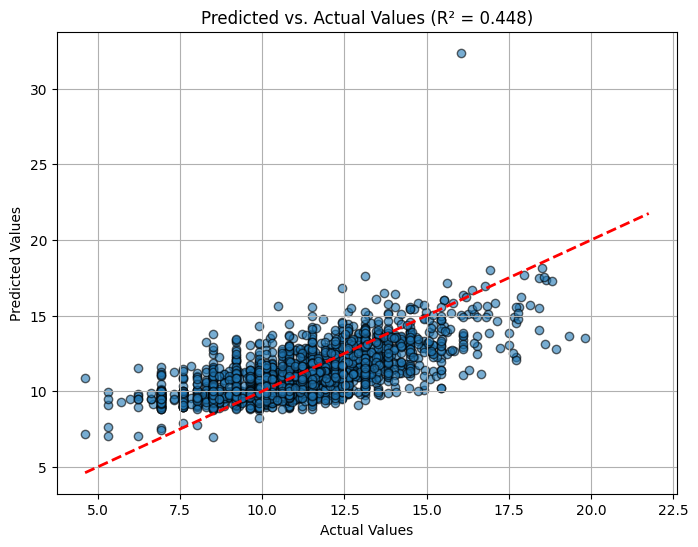

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Split features and target
X = df[df['ln_NET_DAMAGE'] != 0].drop(columns=['NET_DAMAGE', 'ln_NET_DAMAGE', 'TextBlob_Score'])
y = df['ln_NET_DAMAGE'][df['ln_NET_DAMAGE'] != 0]

# Train-test split
X_train_glm, X_test_glm, y_train_glm, y_test_glm = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit GLM model on training set
glm_model = sm.GLM(y_train_glm, X_train_glm, family=sm.families.Gamma(link=sm.families.links.log())).fit()

# Predict on test set
y_pred_glm = glm_model.predict(X_test_glm)
errors = np.abs(np.exp(y_test_glm) - np.exp(y_pred_glm))
dollar_error = np.mean(errors)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_glm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_glm, y_pred_glm)

print("MSE: ", mse)
print("RMSE:", rmse)
print("Dollar Error (exponentiated MAE):", dollar_error)
print("R²:", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_glm, y_pred_glm, alpha=0.6, edgecolors="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs. Actual Values (R² = {r2:.3f})")
plt.grid(True)

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


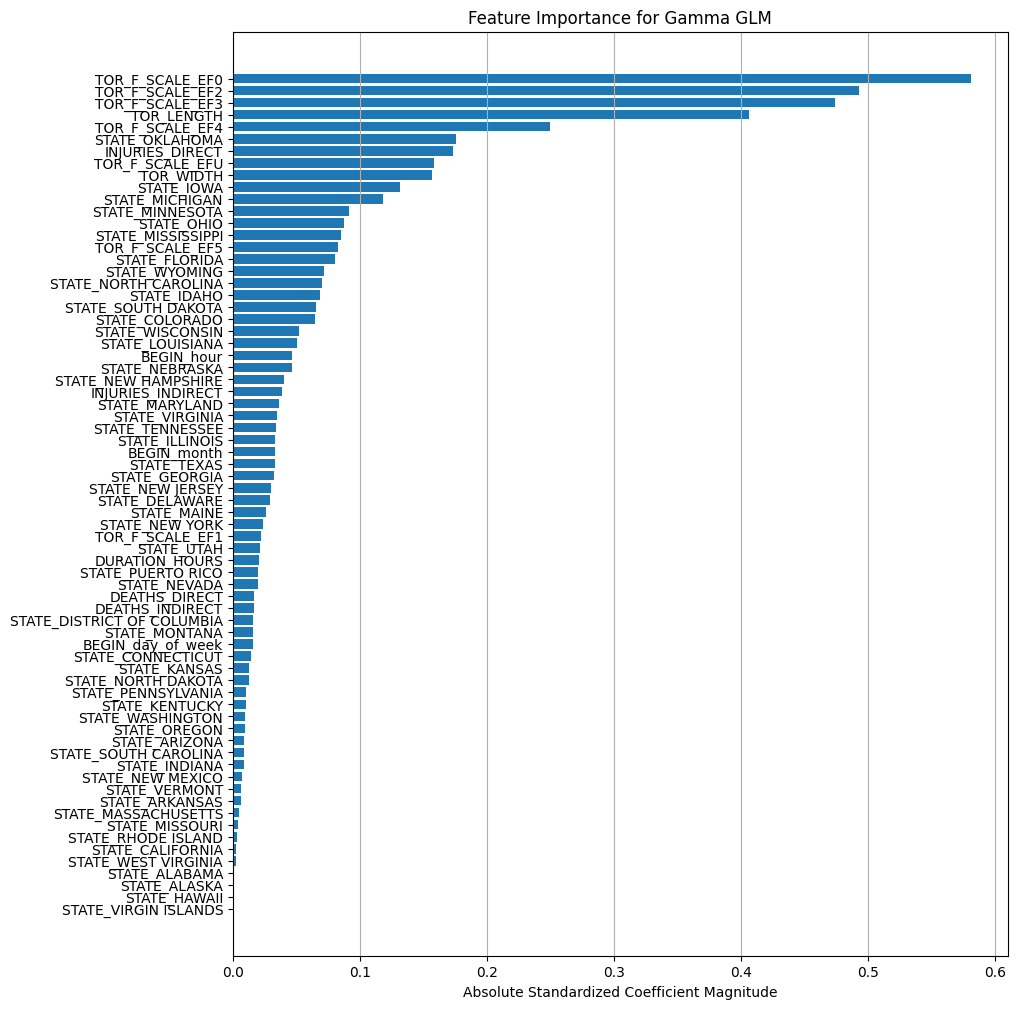

In [114]:
#get coeffs
coefficients = glm_model.params

#create feature importances
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)

glm_model_scaled = sm.OLS(y, X_scaled, family=sm.families.Gamma(link=sm.families.links.log())).fit()

coefficients_scaled = glm_model_scaled.params

import matplotlib.pyplot as plt
import numpy as np

# Skip the intercept for feature importance
feature_importance = np.abs(coefficients_scaled[1:])

# Feature names excluding intercept
feature_names = X.columns

# Create DataFrame for sorting
import pandas as pd
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 12))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Absolute Standardized Coefficient Magnitude')
plt.title('Feature Importance for Gamma GLM')
plt.gca().invert_yaxis()  # highest importance at the top
plt.grid(axis='x')

# Regression Tree Model

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
dtree = DecisionTreeRegressor()

In [90]:
param_grid = {
    "max_depth": [5, 10, 15],  # Prevent overfitting
    "min_samples_split": [5, 10, 20],  # Require more samples to split a node
    "min_samples_leaf": [2, 5, 10, 20],  # Ensure sufficient leaf size
    "ccp_alpha": [0.0, 0.01, 0.05, 0.1],  # Cost Complexity Pruning
}

In [91]:
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

In [92]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.05, 0.1],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [5, 10, 20]},
             scoring='neg_mean_squared_error', verbose=1)

In [93]:
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)

Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best MSE Score: 2.409326219983492


In [94]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
errors = np.abs(np.exp(y_test) - np.exp(y_pred))
dollar_error = np.mean(errors)

print("Test Set MSE:", mse_test)
print("Test Set RMSE:", rmse_test)
print("Dollar Error (exp. MAE):", dollar_error)

Test Set MSE: 2.4018729532304604
Test Set RMSE: 1.5497977136486105
Dollar Error (exp. MAE): 3273693.4879681696


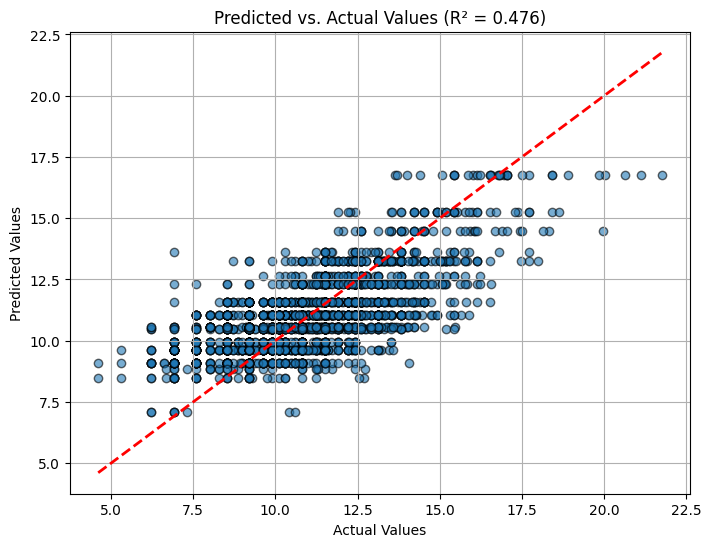

In [95]:
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs. Actual Values (R² = {r2:.3f})")
plt.grid(True)

plt.show()

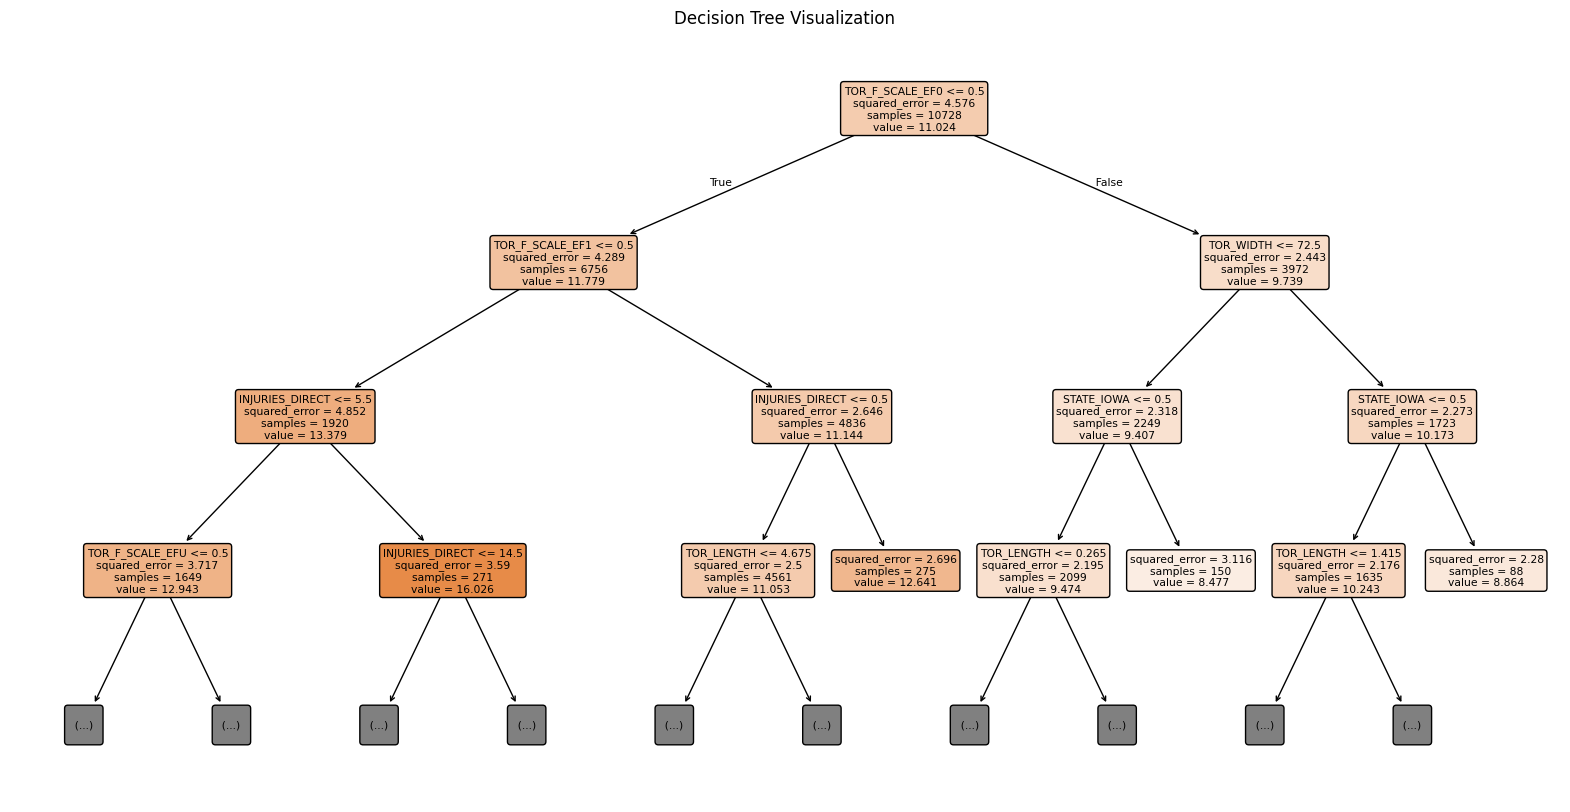

In [96]:
# Set figure size for better visualization
plt.rcParams['figure.figsize'] = (20, 10)

# Extract feature names
feature_names = X.columns if hasattr(X, "columns") else [f"Feature {i}" for i in range(X.shape[1])]

# Plot the best decision tree (use max_depth=3 for clarity)
_ = plot_tree(best_model,
              feature_names=feature_names,
              filled=True,
              rounded=True,
              max_depth=3)  # Limit depth for readability

plt.title("Decision Tree Visualization")
plt.show()

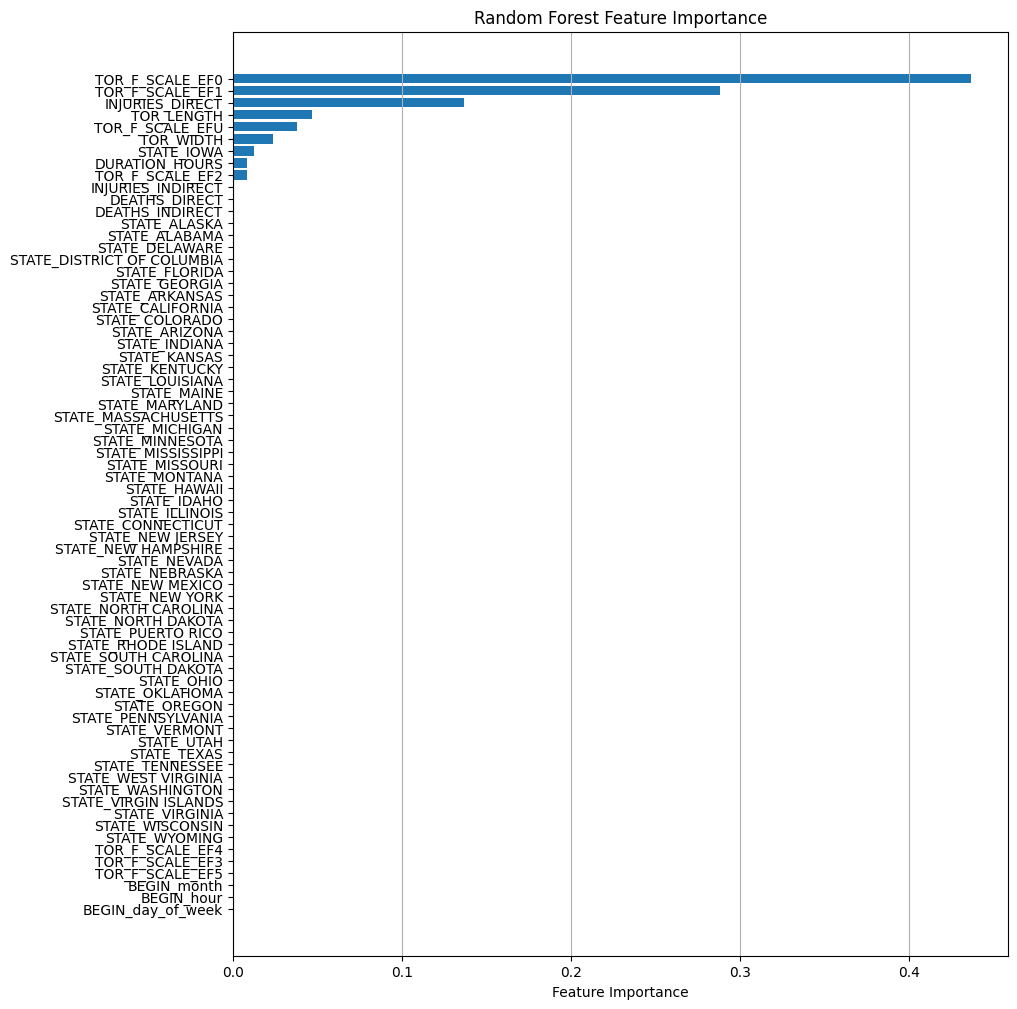

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances from Random Forest
importances = best_model.feature_importances_

# Exclude constant term if present
feature_names = [feat for feat in X.columns]

# Create DataFrame for sorting
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plotting the importance
plt.figure(figsize=(10, 12))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # highest importance at the top
plt.grid(axis='x')
plt.show()


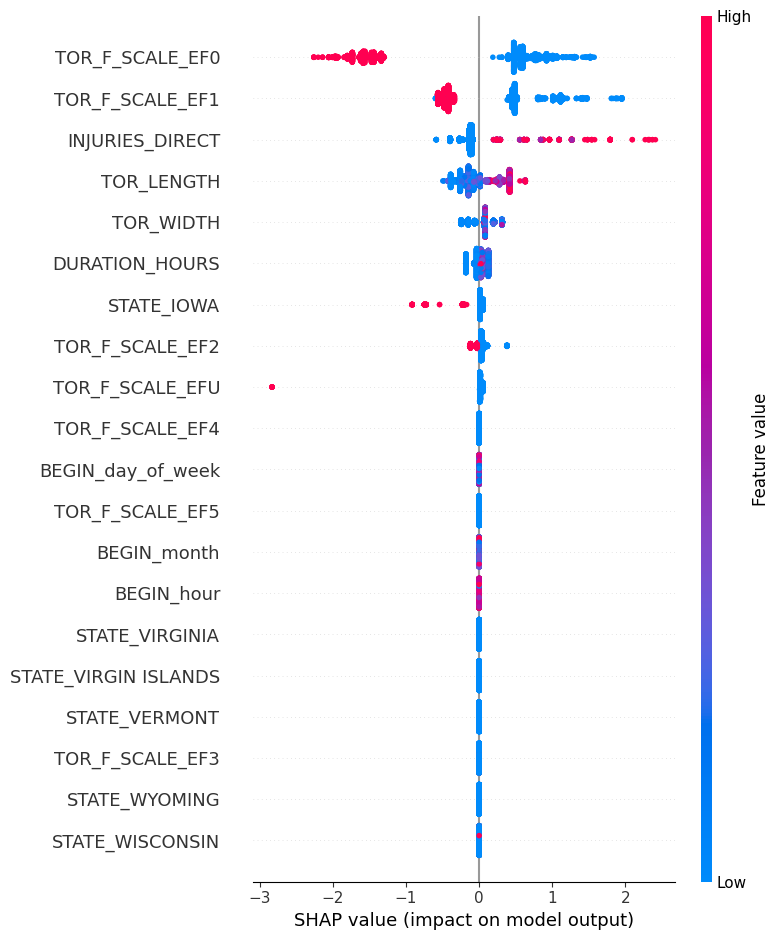

In [98]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names)

# Random Forrests Model:

In [99]:
rf = RandomForestRegressor()

In [100]:
param_grid = {
    'n_estimators': [100, 200],  # Fewer choices for number of trees
    'max_depth': [5, 10],  # Fewer depth options
    'min_samples_split': [2, 5],  # Reduced range
    'min_samples_leaf': [1, 2],  # Fewer options
    'bootstrap': [True],  # Keep only one option for simplicity
}

In [101]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error')

In [102]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [103]:
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best MSE Score: 2.226986102216209


In [104]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
errors = np.abs(np.exp(y_test) - np.exp(y_pred))
dollar_error = np.mean(errors)

print("Test Set MSE:", mse_test)
print("Test Set RMSE:", rmse_test)
print("Dollar Error (exp. MAE):", dollar_error)

Test Set MSE: 2.2407574073993772
Test Set RMSE: 1.4969159653766062
Dollar Error (exp. MAE): 3040735.156797278


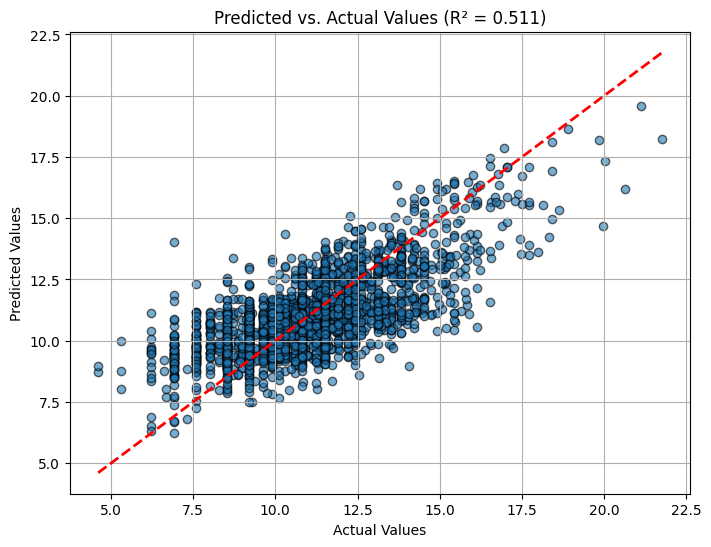

In [105]:
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs. Actual Values (R² = {r2:.3f})")
plt.grid(True)

plt.show()

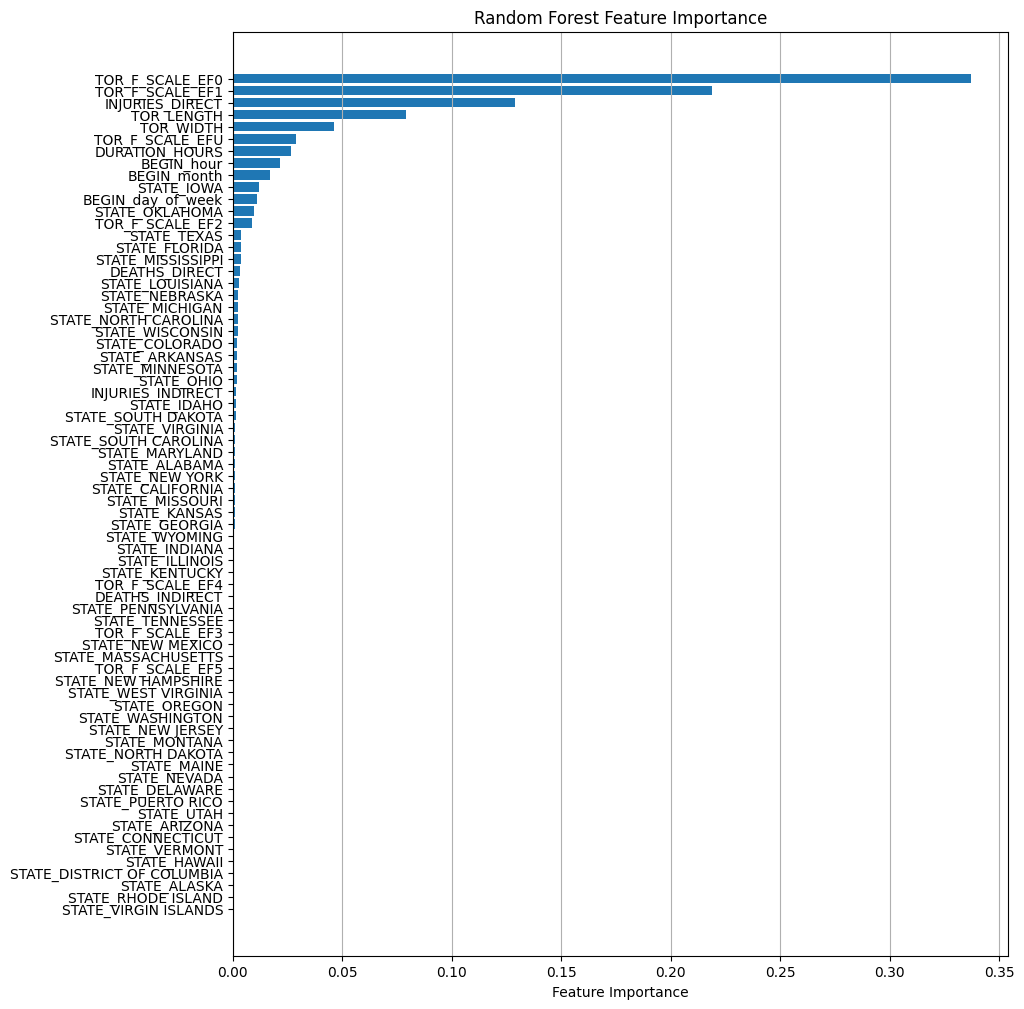

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances from Random Forest
importances = best_model.feature_importances_

# Exclude constant term if present
feature_names = [feat for feat in X.columns if feat != 'const']

# Create DataFrame for sorting
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plotting the importance
plt.figure(figsize=(10, 12))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # highest importance at the top
plt.grid(axis='x')
plt.show()


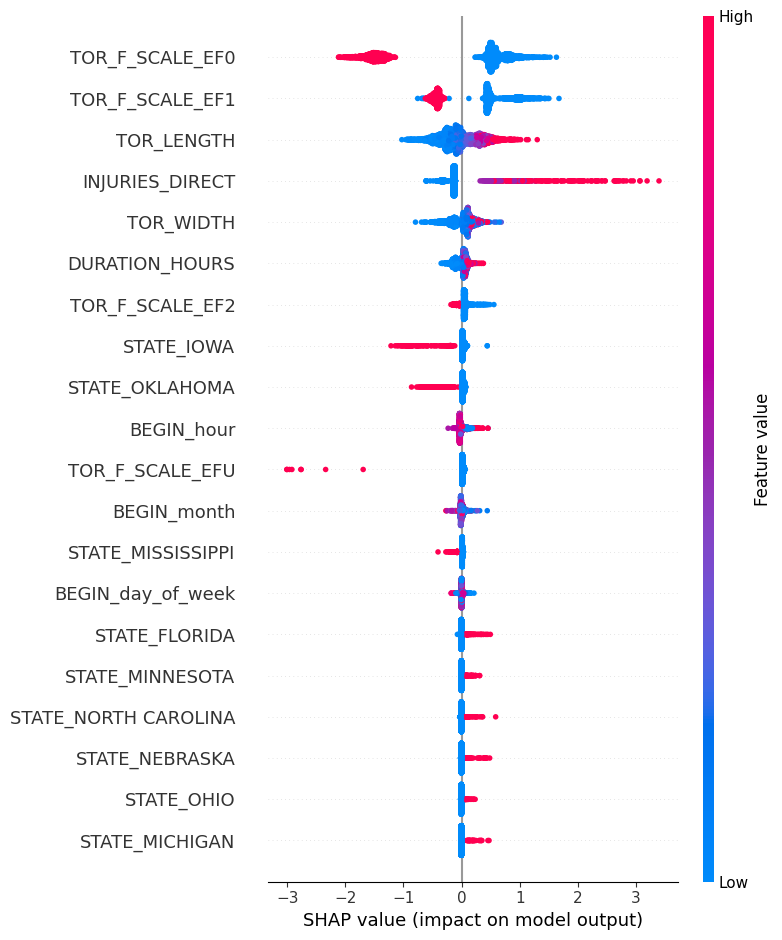

In [107]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names)

# Gradient Boosting Model:

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error: 1155714836462727.2
Root Mean Squared Error: 33995806.15991813
Dollar Error: 1161187.4554618553


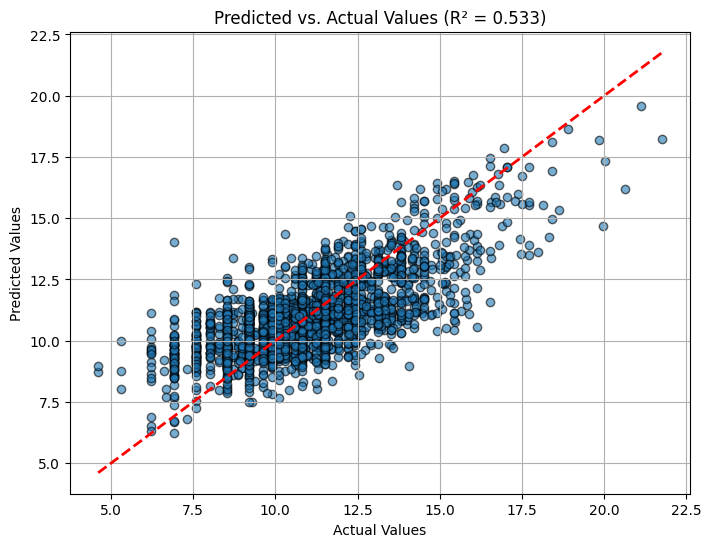

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Split your data into train and test sets
X = df[df['ln_NET_DAMAGE'] != 0].drop(columns=['NET_DAMAGE', 'ln_NET_DAMAGE', 'TextBlob_Score'])
y = df['ln_NET_DAMAGE'][df['ln_NET_DAMAGE'] != 0]

X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
gb_model = GradientBoostingRegressor()

# Set up hyperparameter grid
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1],
    'max_depth': [3],
    'min_samples_split': [2]
}


# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train_gb, y_train_gb)

# Best parameters from the search
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_gb_model = grid_search.best_estimator_

# Predict and evaluate
y_pred_gb = best_gb_model.predict(X_test_gb)
errors = np.abs(np.exp(y_test_gb) - np.exp(y_pred_gb))
dollar_error = np.mean(errors)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Dollar Error: {dollar_error}')

r2 = r2_score(y_test_gb, y_pred_gb)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs. Actual Values (R² = {r2:.3f})")
plt.grid(True)

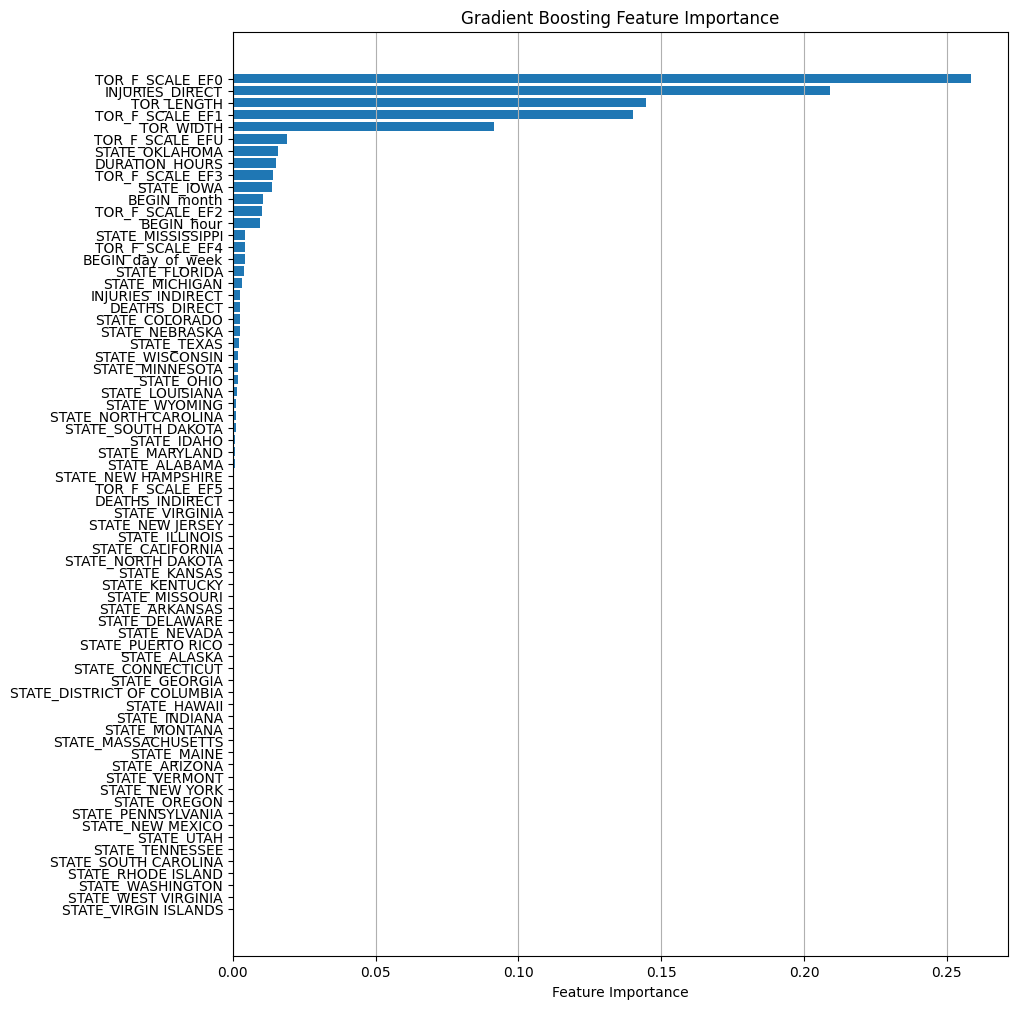

In [111]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances
importances = best_gb_model.feature_importances_

# Exclude the constant term if present
feature_names = [feat for feat in X.columns]

# Create DataFrame for sorting
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 12))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Feature Importance')
plt.gca().invert_yaxis()  # Most important at the top
plt.grid(axis='x')
plt.show()

In [112]:
# Use the following to get information about the model:
print(best_gb_model)

# For a more detailed view of parameters:
print(best_gb_model.get_params())

# To get feature importances:
print(best_gb_model.feature_importances_)

# To print the R-squared score (calculated previously):
print(f"R-squared: {r2}")

GradientBoostingRegressor(n_estimators=150)
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
[2.08913008e-01 2.61489981e-03 2.53404335e-03 5.09960846e-04
 1.44486271e-01 9.12667878e-02 1.51585175e-02 7.55748467e-04
 0.00000000e+00 0.00000000e+00 7.61473399e-05 2.55829481e-04
 2.52965536e-03 0.00000000e+00 7.14493644e-05 0.00000000e+00
 3.89830828e-03 0.00000000e+00 0.00000000e+00 7.74428979e-04
 2.62170383e-04 0.00000000e+00 1.35491302e-02 1.54550424e-04
 1.39996158e-04 1.57271741e-03 0.00000000e+00 7.69300188e-04
 0.00000000e+00 3.18949743e-03 1.93486076e-03 4.33911365e-03
 1.23000